<a href="https://colab.research.google.com/github/rajeevfromkrec/deep_learning/blob/master/First_Deep_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import models, layers
from keras.datasets import mnist,cifar10
from keras import Sequential
#from keras.layers.containers import Graph

from keras.layers.core import Dense, Dropout,Activation,Flatten,Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D,MaxPooling2D,ZeroPadding2D,AveragePooling2D
from keras.callbacks import  EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from PIL import Image

In [0]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [97]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255

In [0]:
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255

In [0]:
y_train.tolist()

In [0]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
#y_train

TypeError: ignored

In [0]:
model=Sequential()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [141]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [0]:
l_rate=1
sgd=SGD(lr=l_rate,momentum=0.8)

In [132]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=2)

ValueError: ignored

In [89]:
model.evaluate(X_test, y_test)[1]

10000/10000 [==============================] - 3s 280us/step


0.9882000088691711

In [0]:
y_hat=model.predict_classes(X_test)
y_hat[0]

In [93]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [0]:
test_wrong=[im for im in zip(X_test,y_hat,y_test) if im[1]!=im[2]]

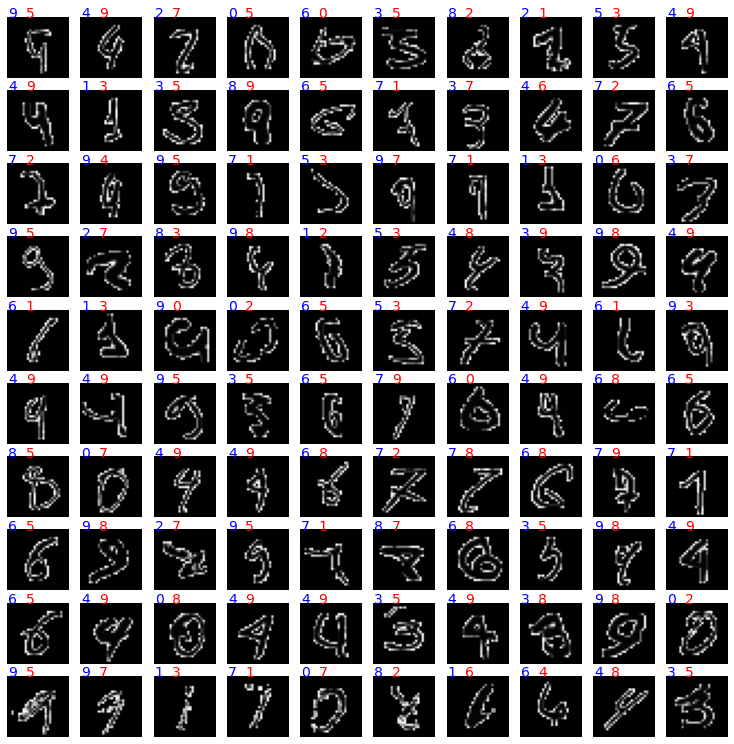

In [105]:
plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')


In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


In [125]:
datagen.fit(X_train)

X_train.shape

(60000, 28, 28, 1)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [143]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2781 - accuracy: 0.9207 - val_loss: 0.0625 - val_accuracy: 0.9814
Epoch 2/2
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0645 - accuracy: 0.9808 - val_loss: 0.0468 - val_accuracy: 0.9857


In [144]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 328us/step


[0.04684351404121844, 0.9857000112533569]